# Data Understanding


| Type                   | Feature                        | Variable Name   | Data Type                                     |
|------------------------|--------------------------------|-----------------|-----------------------------------------------|
| Objective Feature      | Age                            | age             | int (days)                                    |
|                        | Height                         | height          | int (cm)                                      |
|                        | Weight                         | weight          | float (kg)                                    |
|                        | Gender                         | gender          | 1: female, 2: male                            |
| Examination Feature    | Systolic blood pressure        | ap_hi           | int                                           |
|                        | Diastolic blood pressure       | ap_lo           | int                                           |
|                        | Cholesterol                    | cholesterol     | 1: normal, 2: above normal, 3: well above normal |
|                        | Glucose                        | gluc            | 1: normal, 2: above normal, 3: well above normal |
| Subjective Feature     | Smoking                        | smoke           | binary                                        |
|                        | Alcohol intake                 | alco            | binary                                        |
|                        | Physical activity              | active          | binary                                        |
| Target Variable        | Presence or absence of cardiovascular disease | cardio   | binary                                        |


Dataset avaiable @ https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_feature_info(df, feature, target):
    fig = plt.figure(figsize=(10, 3))
    grid = fig.add_gridspec(1, 10, wspace=0)
    fig.suptitle(f"Attributo: {feature}", fontsize=14, ha='center')

    # Asse per il testo
    ax_text = fig.add_subplot(grid[:, :3])
    ax_text.axis('off')

    # Asse per il grafico
    ax_chart = fig.add_subplot(grid[:, 3:])

    # Statistiche sulla feature
    feature_stats = df[feature].describe()
    min_val = feature_stats['min']
    max_val = feature_stats['max']
    mean_val = feature_stats['mean']
    std_val = feature_stats['std']

    # Numero di valori mancanti e percentuale di valori mancanti
    missing_count = df[feature].isnull().sum()
    missing_percentage = missing_count / len(df) * 100

    # Numero di valori unici
    unique_values = df[feature].nunique()

    # Informazioni statistiche
    stats_title = "Statistiche:"
    stats_text = f"\nMin: {min_val:.2f}\nMax: {max_val:.2f}\nMedia: {mean_val:.2f}\nStdDev: {std_val:.2f}"

    # Altre informazioni
    other_info_title = "Altre Informazioni:"
    other_info_text = f"\nMissing: {missing_count} ({missing_percentage:.2f}%)\nDistinct: {unique_values}"

    # Posizionamento delle info a sinistra
    ax_text.text(0, 0.8, stats_title, fontsize=10, va='top', weight='bold')
    ax_text.text(0.1, 0.8, stats_text, fontsize=10, va='top')
    ax_text.text(0, 0.4, other_info_title, fontsize=10, va='top', weight='bold')
    ax_text.text(0.1, 0.4, other_info_text, fontsize=10, va='top')

    # Discretizziamo con bin di equal width le feature con più di 50 valori unici
    if unique_values > 50:
        feature = pd.cut(df[feature], bins=(int(unique_values/10)))

    # Grafico di distribuzione con focus sulla variabile target a destra
    sns.countplot(data=df, x=feature, hue=target, ax=ax_chart, palette={0: 'blue', 1: 'red'}, hue_order=[0, 1])

    if unique_values > 50:
        plt.xticks(rotation=45)

    ax_chart.set_xlabel('')
    ax_chart.set_ylabel('')

    plt.show()

In [3]:
original_df = pd.read_csv('cardio.csv', delimiter=';')
df = original_df.copy()

Droppiamo la colonna degli id

In [4]:
df = df.drop('id',axis=1)

Trasformiamo la feature age, che esprime l'età dei pazienti in giorni, in anni

In [5]:
df['age'] = (df['age'] / 365).round().astype('int')

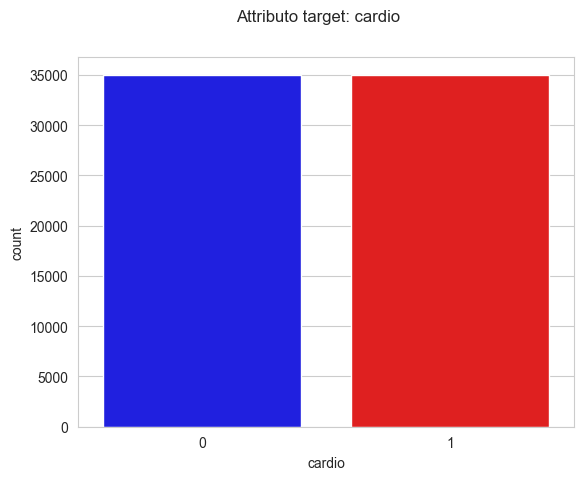

Pazienti senza problemi cardiovascolari: 35021
Pazienti con problemi cardiovascolari: 34979


In [6]:
sns.countplot(data=df,x='cardio',palette={0: 'blue', 1: 'red'})
plt.suptitle("Attributo target: cardio")
plt.show()
print("Pazienti senza problemi cardiovascolari:", len(df[df['cardio'] == 0]))
print("Pazienti con problemi cardiovascolari:", len(df[df['cardio'] == 1]))


Osservando il grafico relativo alla variabile target possiamo affermare di trovarci davanti a un dataset bilanciato

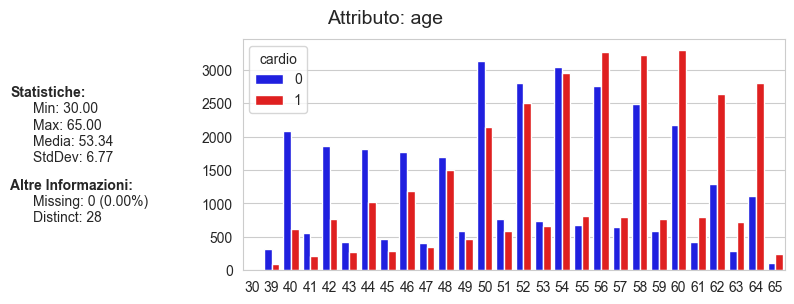

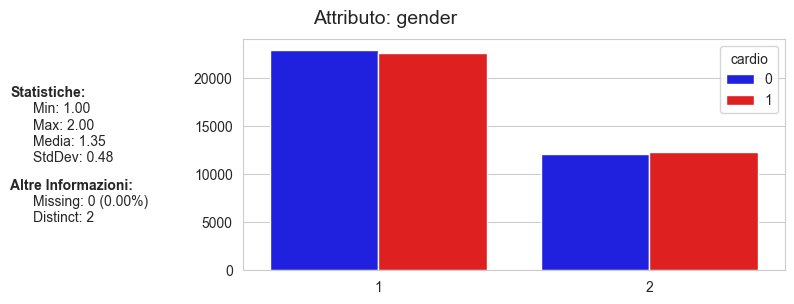

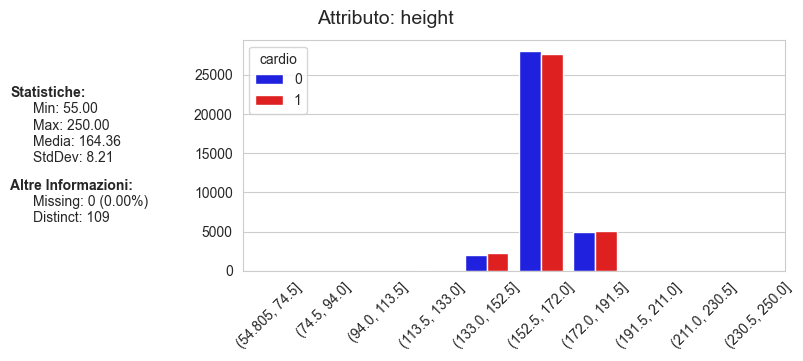

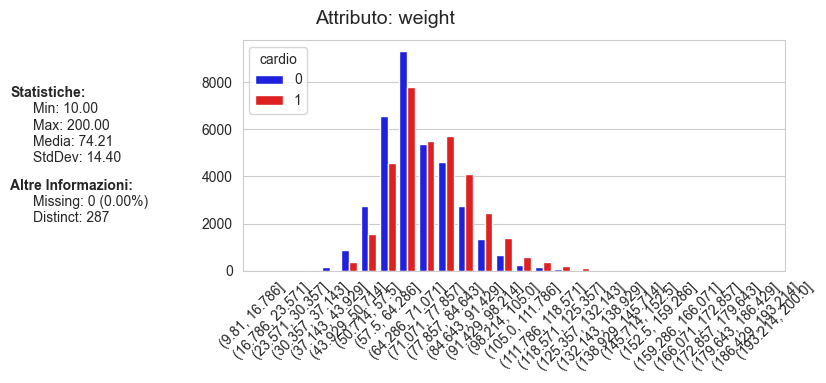

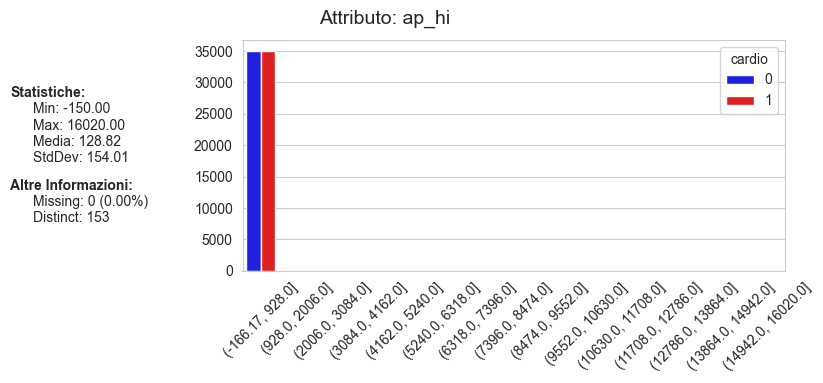

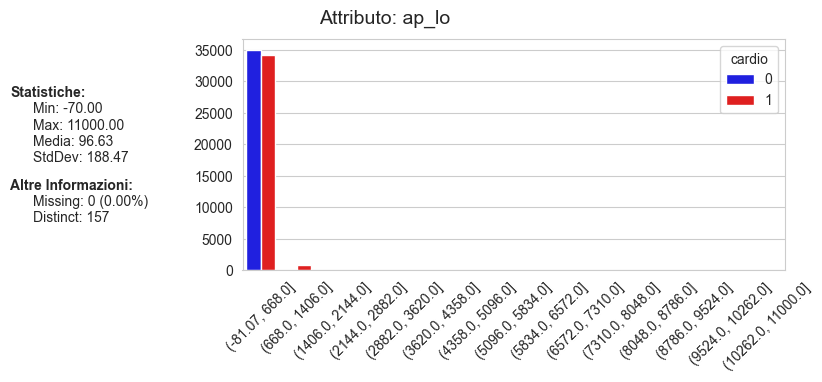

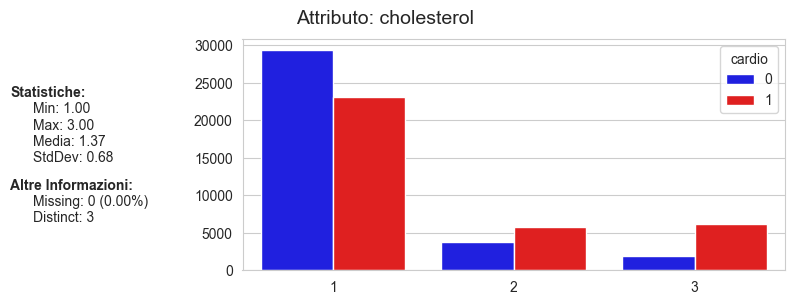

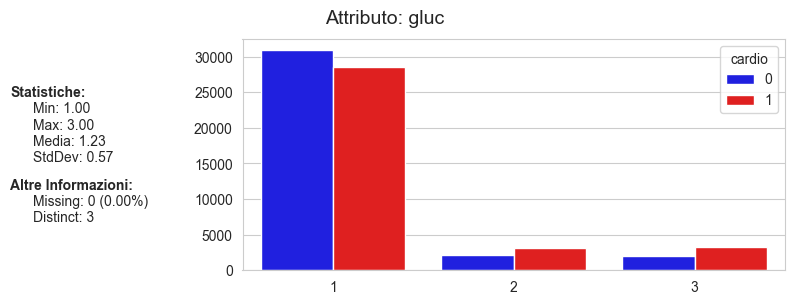

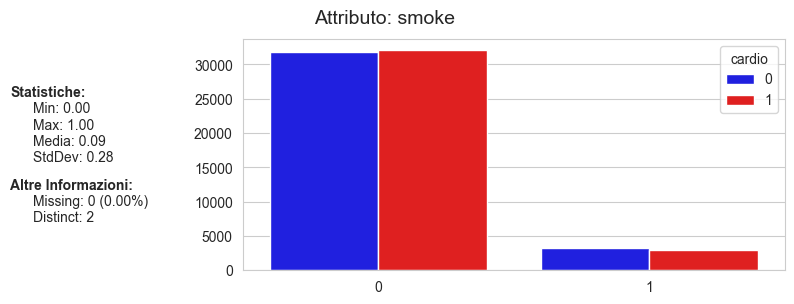

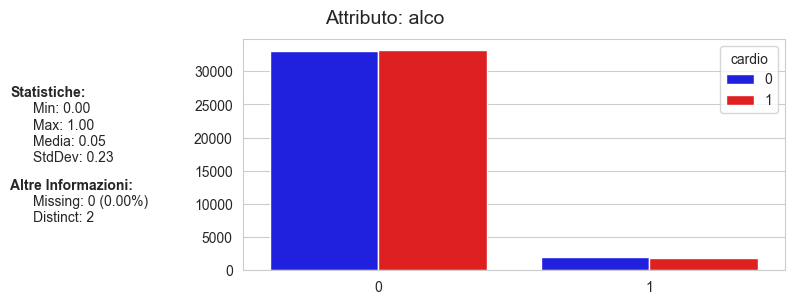

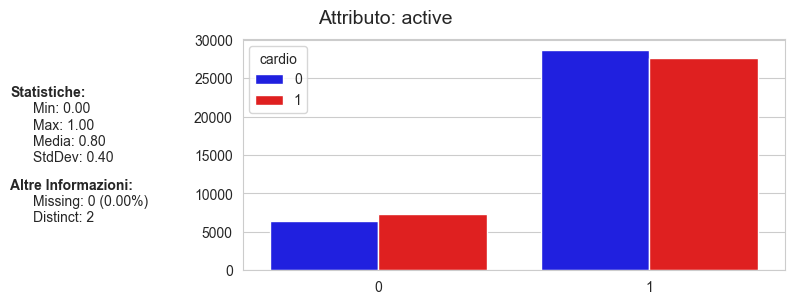

In [7]:
features = df.iloc[:, :-1].columns.tolist()

for feature in features:
    generate_feature_info(df,feature,'cardio')

Osservando il report delle feature possiamo fare diverse considerazioni:

•Con l'avanzare dell'età il rischio cardiovascolare aumenta

•Notiamo la presenza di valori distorti nelle colonne relative alla pressione sanguigna, altezza e peso.

  In particolare abbiamo valori negativi o eccessivamente alti per quanto riguarda la pressione e valori eccessivamente bassi per quanto riguarda il peso e l'altezza, considerando che l'età minima dei pazienti è di 30 anni

• I pazienti con valori di glucosio e colesterolo più alti tendono a riportare una maggiore probabilità di problemi cardiovasolari

# Data Preparation

## Data Cleaning

### Cleaning pressione sanguigna


<Axes: xlabel='ap_lo', ylabel='ap_hi'>

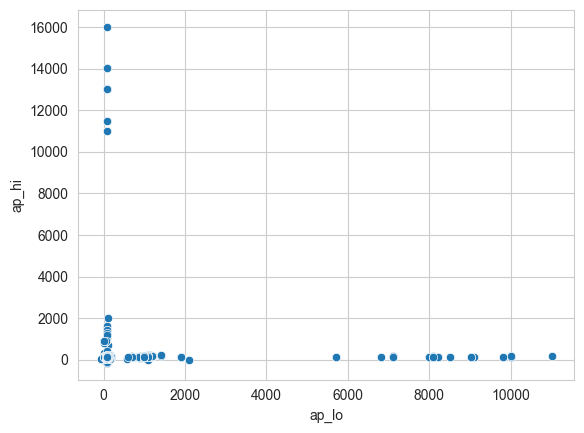

In [8]:
sns.scatterplot(data=df, x='ap_lo',y='ap_hi')

Osservando il grafico in figura notiamo la presenza di valori a 4-5 cifre, impossibili per la pressione sanguingna, ipotizziamo errori nell'inserimento dei dati (i.e. 16020 => 160.20)

Riportiamo quindi i valori all'interno delle tre cifre e moltiplichiamo per -1 i valori negativi

<Axes: xlabel='ap_lo', ylabel='ap_hi'>

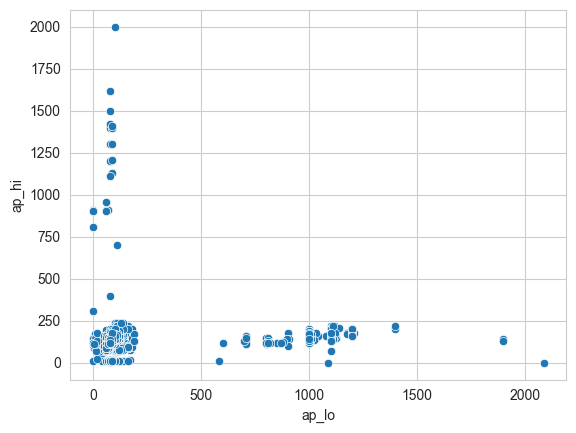

In [9]:
df.loc[df['ap_hi'] < 0, 'ap_hi'] *= -1
df.loc[df['ap_lo'] < 0, 'ap_lo'] *= -1

df.loc[df['ap_hi'] >= 4000, 'ap_hi'] /= 100
df.loc[df['ap_lo'] >= 4000, 'ap_lo'] /= 100

sns.scatterplot(data=df, x='ap_lo',y='ap_hi')

<Axes: xlabel='ap_lo', ylabel='ap_hi'>

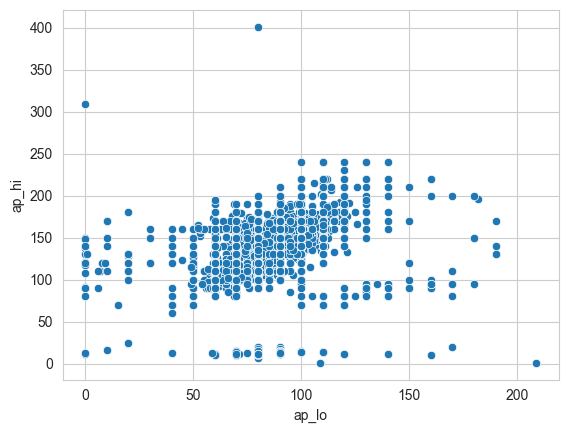

In [10]:
df.loc[df['ap_hi'] >= 500, 'ap_hi'] /= 10
df.loc[df['ap_lo'] >= 500, 'ap_lo'] /= 10

sns.scatterplot(data=df, x='ap_lo',y='ap_hi')

Poichè la pressione sistolica è il valore di pressione arteriosa nel momento in cui il cuore è in fase di contrazione mentre la pressione diastolica è il valore in fase di rilassamento, droppiamo tutti record che hanno pressione diastolica maggiore di quella sistolica

<Axes: xlabel='ap_lo', ylabel='ap_hi'>

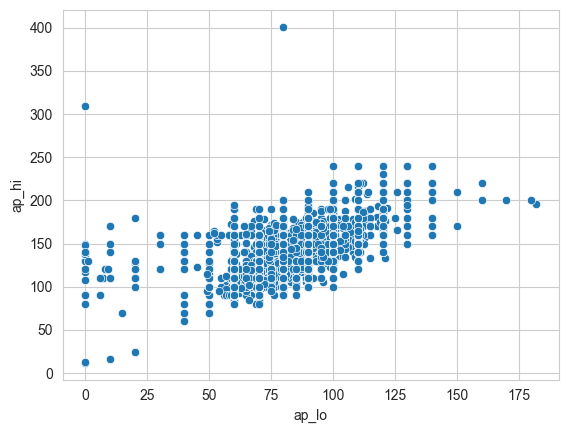

In [11]:
#rimuoviamo tutte le righe che hanno ap_lo > ap_hi
rows_dropped = df[df['ap_lo'] > df['ap_hi']].shape[0]
df = df.drop(df[df['ap_lo'] > df['ap_hi']].index)
sns.scatterplot(data=df, x='ap_lo',y='ap_hi')



Il metodo di rimozione degli outliers utilizzato si basa sull'uso di soglie multiple della deviazione standard rispetto alla media dei dati. A ogni iterazione, si osservano i nuovi valori minimi e massimi delle variabili.

In [12]:
# Calcolo della media e della deviazione standard per le due colonne
mean_ap_lo = np.mean(df['ap_lo'])
std_ap_lo = np.std(df['ap_lo'])
mean_ap_hi = np.mean(df['ap_hi'])
std_ap_hi = np.std(df['ap_hi'])

# Iterazione del valore soglia da 1 a 10
for threshold in range(1, 11):
    # Rimozione degli outliers basati sulla soglia definita
    filtered_df = df[(np.abs(df['ap_lo'] - mean_ap_lo) < threshold * std_ap_lo) &
                     (np.abs(df['ap_hi'] - mean_ap_hi) < threshold * std_ap_hi)]

    # Calcolo numero di outliers rimossi
    n_outliers = len(df) - len(filtered_df)
    # Calcolo del minimo e massimo dopo la rimozione degli outliers
    min_ap_lo = np.min(filtered_df['ap_lo'])
    max_ap_lo = np.max(filtered_df['ap_lo'])
    min_ap_hi = np.min(filtered_df['ap_hi'])
    max_ap_hi = np.max(filtered_df['ap_hi'])

    print("Valore soglia:", threshold)
    print("Numero di outliers: ",n_outliers)
    print("ap_lo:  min= ", min_ap_lo,"   max= ",max_ap_lo)
    print("ap_hi:  min= ", min_ap_hi,"   max= ",max_ap_hi)
    print()

Valore soglia: 1
Numero di outliers:  24987
ap_lo:  min=  72.0    max=  91.0
ap_hi:  min=  110.0    max=  144.0

Valore soglia: 2
Numero di outliers:  5355
ap_lo:  min=  62.0    max=  101.1
ap_hi:  min=  93.0    max=  161.0

Valore soglia: 3
Numero di outliers:  1279
ap_lo:  min=  52.0    max=  111.1
ap_hi:  min=  80.0    max=  178.0

Valore soglia: 4
Numero di outliers:  265
ap_lo:  min=  45.0    max=  121.1
ap_hi:  min=  70.0    max=  195.0

Valore soglia: 5
Numero di outliers:  112
ap_lo:  min=  40.0    max=  130.0
ap_hi:  min=  60.0    max=  210.0

Valore soglia: 6
Numero di outliers:  68
ap_lo:  min=  30.0    max=  140.0
ap_hi:  min=  60.0    max=  220.0

Valore soglia: 7
Numero di outliers:  42
ap_lo:  min=  15.0    max=  150.0
ap_hi:  min=  24.0    max=  240.0

Valore soglia: 8
Numero di outliers:  26
ap_lo:  min=  6.0    max=  160.0
ap_hi:  min=  16.0    max=  240.0

Valore soglia: 9
Numero di outliers:  4
ap_lo:  min=  0.0    max=  170.0
ap_hi:  min=  12.0    max=  240.0

Valo

Considerando i risultati ottenuti scegliamo 5 come valore soglia

<Axes: xlabel='ap_lo', ylabel='ap_hi'>

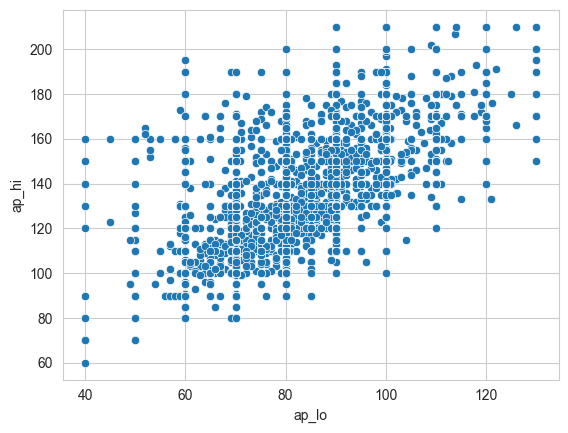

In [13]:

threshold = 5

mean_ap_lo = np.mean(df['ap_lo'])
std_ap_lo = np.std(df['ap_lo'])
mean_ap_hi = np.mean(df['ap_hi'])
std_ap_hi = np.std(df['ap_hi'])

df = df[(np.abs(df['ap_lo'] - mean_ap_lo) < threshold * std_ap_lo) & (np.abs(df['ap_hi'] - mean_ap_hi) < threshold * std_ap_hi)]

sns.scatterplot(data=df, x='ap_lo',y='ap_hi')


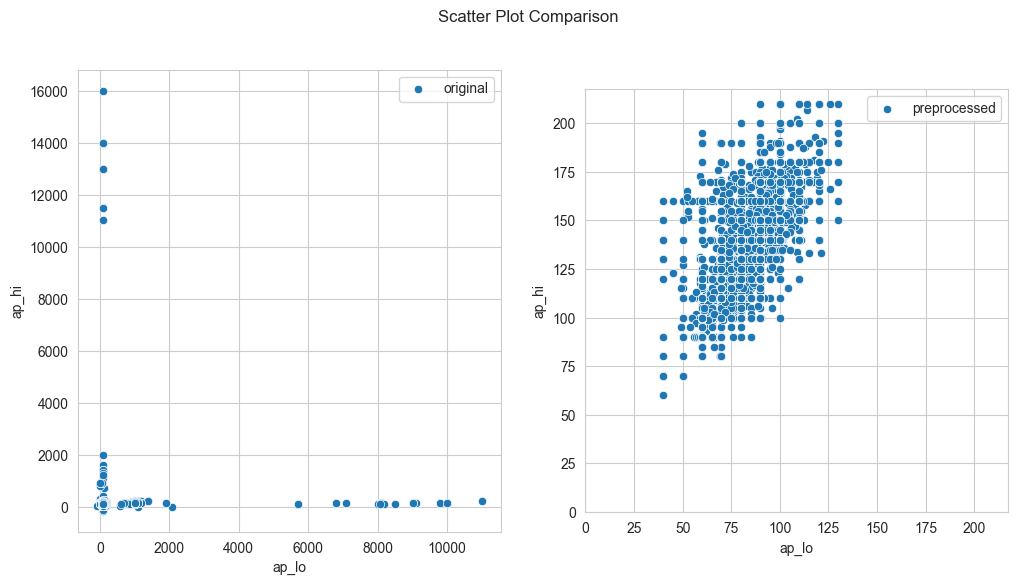

Prima della rimozione degli outliers: 70000
Dopo della rimozione degli outliers: 69606


In [14]:
# Plot comparazione prima e dopo preprocessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=original_df, x='ap_lo', y='ap_hi', label='original', ax=ax1)
sns.scatterplot(data=df, x='ap_lo', y='ap_hi', label='preprocessed', ax=ax2)

ax1.set_xlabel('ap_lo')
ax1.set_ylabel('ap_hi')
ax2.set_xlabel('ap_lo')
ax2.set_ylabel('ap_hi')

plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(bottom=0)
plt.xlim(plt.ylim())

fig.suptitle('Scatter Plot Comparison')
plt.legend()
plt.show()

print('Prima della rimozione degli outliers:', original_df.shape[0])
print('Dopo della rimozione degli outliers:', df.shape[0])


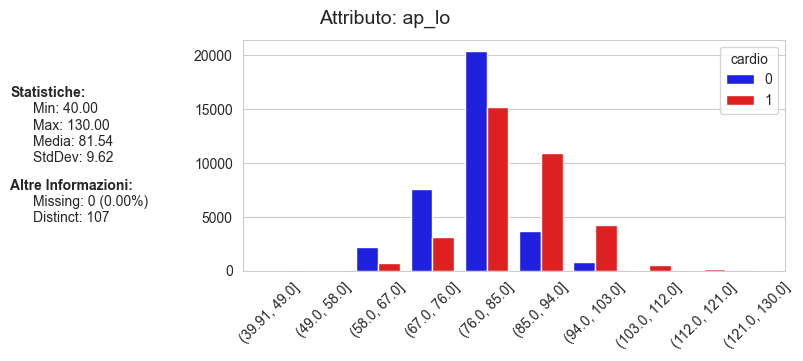

In [15]:
generate_feature_info(df,'ap_lo','cardio')

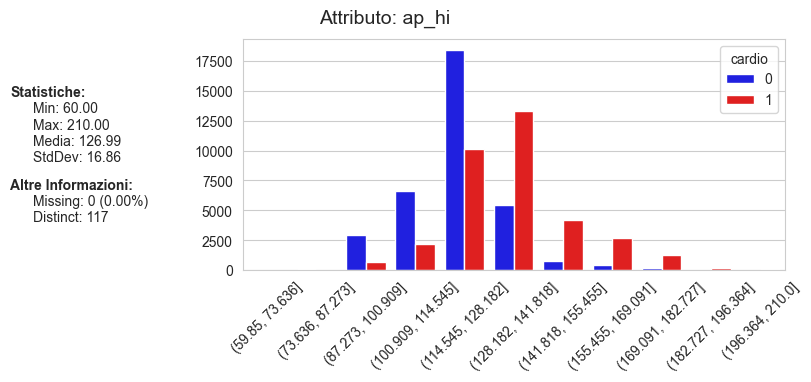

In [16]:
generate_feature_info(df,'ap_hi','cardio')

### Cleaning peso e altezza

(0.0, 259.75)

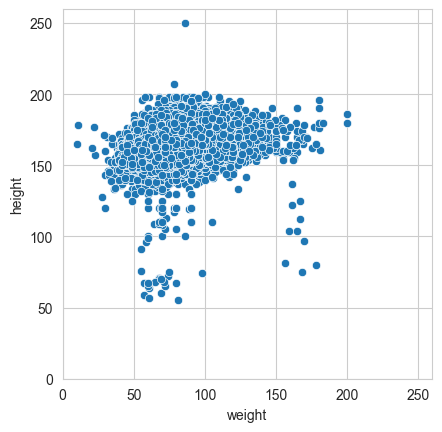

In [17]:
sns.scatterplot(data=df, x='weight',y='height')
plt.gca().set_aspect('equal', adjustable='box')
sns.set_style("ticks")
plt.ylim(0)
plt.xlim(plt.ylim())

Droppiamo i record con valori di altezza inferiori a 125 cm e peso inferiori a 40 kg.

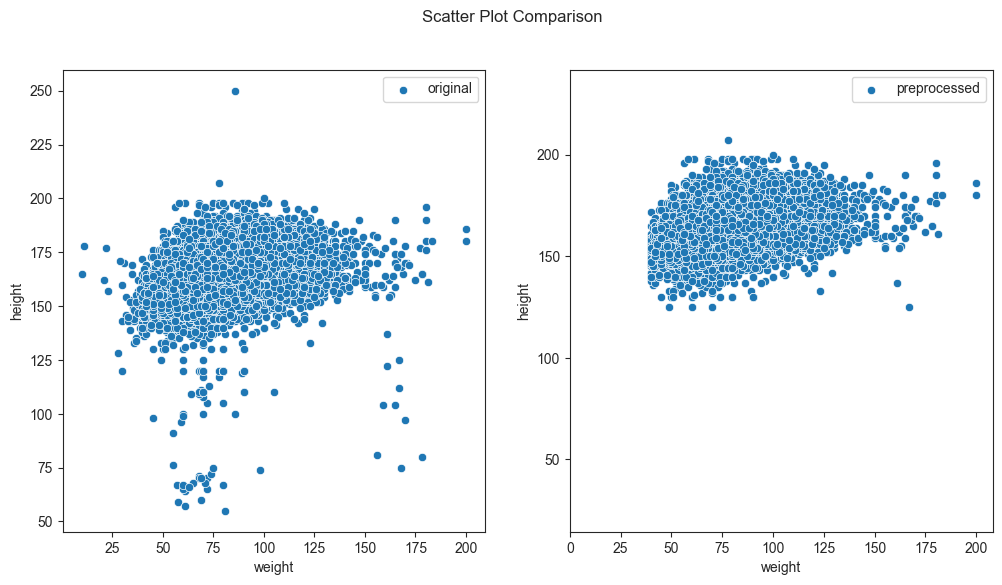

Prima della rimozione degli outliers: 69606
Dopo della rimozione degli outliers: 69471


In [18]:
n_rows_first_step = df.shape[0]

df.drop(df[df['height'] < 125].index, inplace=True)
df.drop(df[df['weight'] < 40].index, inplace=True)

# Plot comparazione prima e dopo preprocessing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=original_df, x='weight', y='height', label='original', ax=ax1)
sns.scatterplot(data=df, x='weight', y='height', label='preprocessed', ax=ax2)

ax1.set_xlabel('weight')
ax1.set_ylabel('height')
ax2.set_xlabel('weight')
ax2.set_ylabel('height')

plt.gca().set_aspect('equal', adjustable='datalim')
plt.xlim(0)
plt.ylim(0)

fig.suptitle('Scatter Plot Comparison')

plt.legend()
plt.show()

print('Prima della rimozione degli outliers:', n_rows_first_step)
print('Dopo della rimozione degli outliers:', df.shape[0])

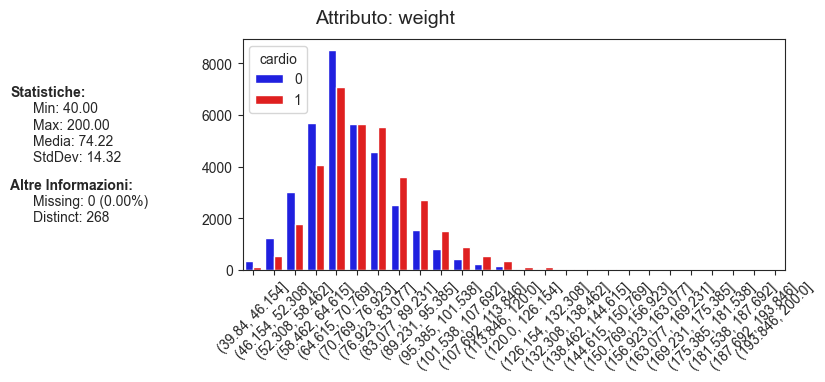

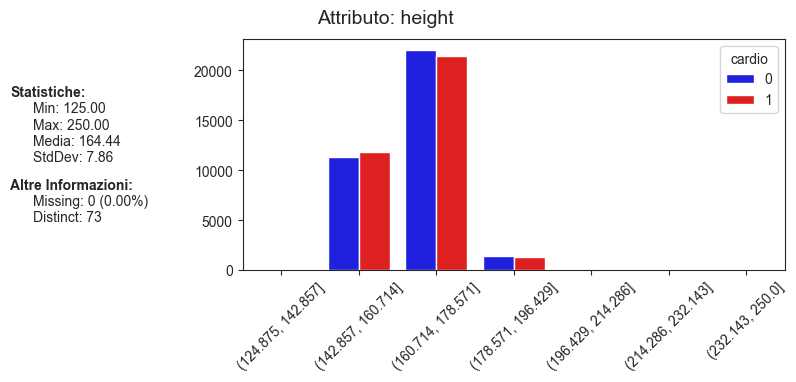

In [19]:
generate_feature_info(df,'weight','cardio')
generate_feature_info(df,'height','cardio')

Alla fine di questa fase di cleaning dei dati il nostro dataset è composto da 69471 istanze, 529 in meno del dataset originale

## Data Construction

Per alleviare gli effetti della curse of dimensionality andiamo a costruire nuove features.
Visualizziamo la matrice di correlazione per individuare le features che possiamo aggregare


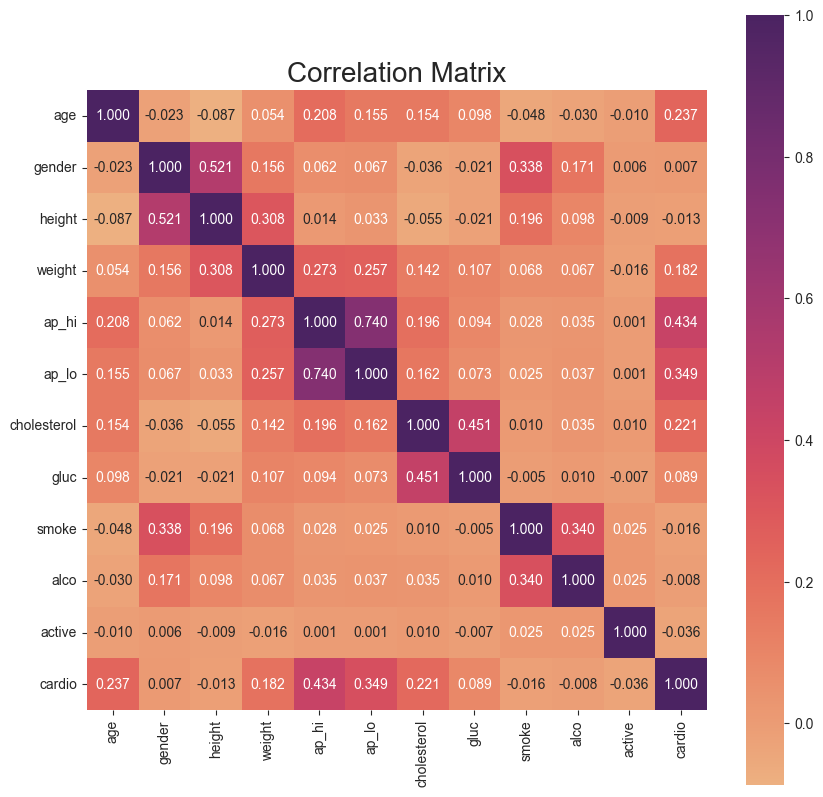

In [20]:
corr = df.corr().round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='flare', square=True, fmt='.3f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=20)
plt.show()


### Feature BMI

Costruiamo una nuova colonna contenente l'indice di massa corporea (bmi) e droppiamo le colonne relative a peso e altezza

In [21]:
df['bmi'] = df["weight"] / (df["height"]/100)**2
df = df.drop('weight',axis=1)
df = df.drop('height',axis=1)

### Feature Blood Pressure Category

Ultilizzando la tabella sotto aggreghiamo le colonne 'ap_lo' e 'ap_hi' in un unica colonna: 'blood_pressure_category'


| Classificazione                      | Pressione Massima (mm Hg) | Pressione Minima (mm Hg) |
|--------------------------------------|--------------------------|-------------------------|
| Ipertensione sistolica isolata       | Maggiore o uguale a 140   | Minore o uguale a 90     |
| Ottimale                             | Minore di 120             | Minore di 80            |
| Normale                              | Tra 120 e 129             | Tra 80 e 84             |
| Normale-alta                         | Tra 130 e 139             | Tra 85 e 89             |
| Ipertensione                         | Maggiore di 140           | Maggiore di 90           |


avaiable @ https://healthy.thewom.it/esami-e-analisi/pressione-arteriosa/

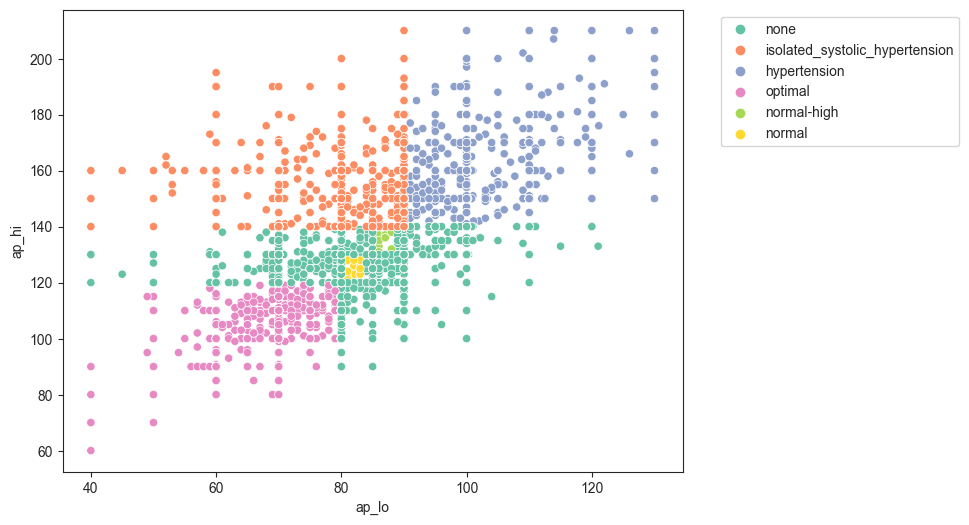

Numero di valori 'none' : 41730


In [22]:
def classify_blood_pressure(ap_lo, ap_hi):
    if ap_lo <= 90 and ap_hi >= 140:
        return "isolated_systolic_hypertension"
    elif ap_lo < 80 and ap_hi < 120:
        return "optimal"
    elif 80 < ap_lo < 84 and 120 < ap_hi <= 129:
        return "normal"
    elif 85 < ap_lo < 89 and 130 < ap_hi <= 139:
        return "normal-high"
    elif ap_hi > 140 and ap_lo > 90:
        return "hypertension"
    else:
        return "none"

# Applicazione della funzione per creare la nuova colonna
df['blood_pressure_category'] = df.apply(lambda row: classify_blood_pressure(row['ap_lo'],row['ap_hi']), axis=1)

count_none= df['blood_pressure_category'].value_counts().get('none', 0)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ap_lo', y='ap_hi', hue='blood_pressure_category', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Stampa dei conteggi dei valori 'none'
print("Numero di valori 'none' :", count_none)


Circa il 60% dei valori di pressione arteriosa non ricade in nessuna delle categorie su definite, andiamo quindi ad assegnare ai punti 'none' la categoria alla quale sono più vicini secondo distanza euclidea

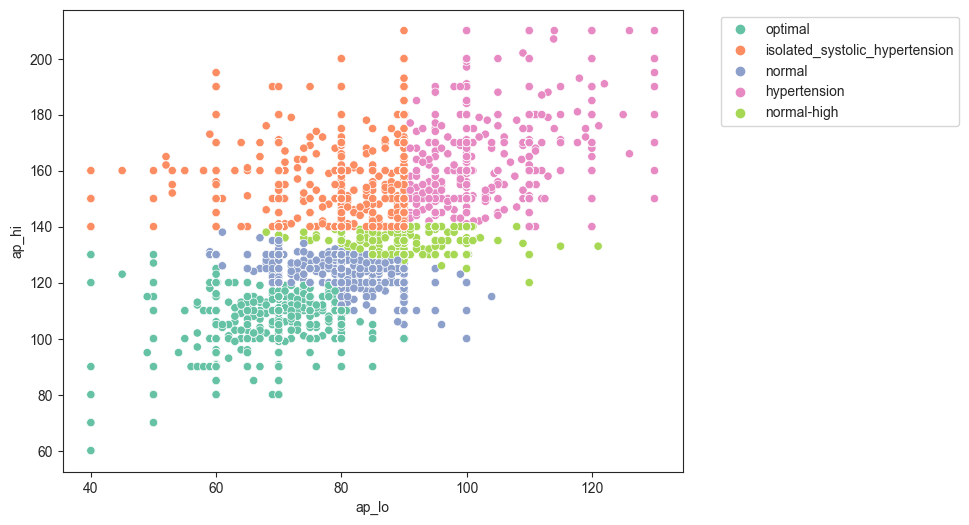

In [23]:
# Calcolo delle coordinate del centro per ogni categoria diversa da 'none'
centers = {}
categories = df['blood_pressure_category'].unique()
for category in categories:
    if category != 'none':
        category_points = df[df['blood_pressure_category'] == category]
        center = (np.mean(category_points['ap_lo']), np.mean(category_points['ap_hi']))
        centers[category] = center

# Assegnazione delle categorie ai punti appartenenti a 'none' in base alla distanza euclidea
for index, row in df.iterrows():
    if row['blood_pressure_category'] == 'none':
        point = (row['ap_lo'], row['ap_hi'])
        min_distance = float('inf')
        assigned_category = None

        for category, center in centers.items():
            distance = np.linalg.norm(np.array(point) - np.array(center))
            if distance < min_distance:
                min_distance = distance
                assigned_category = category

        df.at[index, 'blood_pressure_category'] = assigned_category

# Plot dei punti sul grafico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ap_lo', y='ap_hi', hue='blood_pressure_category', palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [24]:
category_mapping = {
    'optimal': 1,
    'normal': 2,
    'normal-high': 3,
    'hypertension': 4,
    'isolated_systolic_hypertension': 5
}

df['blood_pressure_category'] = df['blood_pressure_category'].map(category_mapping)

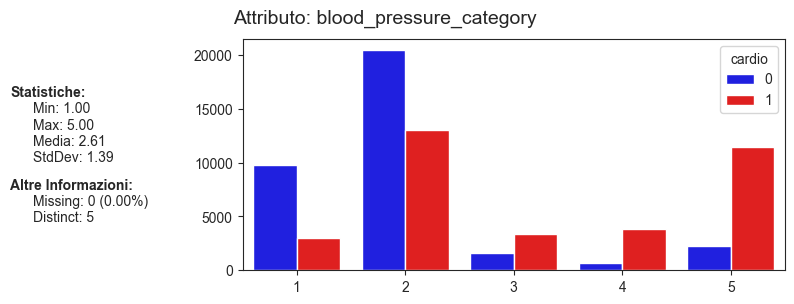

In [25]:
generate_feature_info(df,'blood_pressure_category','cardio')

Possiamo quindi rimuovere le colonne 'ap_lo', 'ap_hi'

In [26]:
df = df.drop(['ap_lo','ap_hi'],axis=1)

Dalla matrice di correlazione notiamo che le caratteristiche 'smoke' e 'alco' hanno un coefficente di 0.34, possiamo quindi unire le due feature in un'unica: 'addict', che indica quindi se il paziente ha un qualche tipo di dipendenza, che sia alcol o fumo

In [27]:
df['addict'] = (df['alco'] | df['smoke']).astype(int)
df = df.drop(['alco','smoke'],axis=1)

# Modeling

In questa fase di modeling andiamo a testare diversi algoritmi, e per ognuno di questi una diversa configurazione di parametri. Utilizziamo 10-fold cross validation e l'accuracy come metrica di valutazione.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
]

param_grid = [
    # Logistic Regression
    {
        'penalty': ['l1', 'l2'],  # Tipo di regolarizzazione (l1 o l2)
        'C': [0.1, 1, 10],  # Parametro di regolarizzazione inverso (più alto è il valore, meno regolarizzazione)
        'solver': ['liblinear', 'saga'],  # Algoritmo di ottimizzazione per la regressione logistica
        'max_iter': [1000, 10000],  # Numero massimo di iterazioni per la convergenza
        'fit_intercept': [True, False],  # Se includere o meno l'intercetta nel modello
        'class_weight': [None, 'balanced']  # Peso da assegnare alle classi nel calcolo della funzione di costo
    },
    #  Decision Tree
    {
        'criterion': ['gini', 'entropy'],  # Misura d'impurità utilizzata per la suddivisione dei nodi
        'max_depth': [None, 5, 10, 20],  # Profondità massima dell'albero
        'min_samples_split': [2, 5, 10],  # Numero minimo di campioni richiesti per effettuare una suddivisione
        'min_samples_leaf': [1, 2, 4]  # Numero minimo di campioni richiesti in una foglia
    },
    # Random Forest
    {
        'n_estimators': [50, 100, 200],  # Numero di alberi nella foresta
        'max_depth': [None, 5, 10, 20],  # Profondità massima degli alberi
        'min_samples_split': [2, 5, 10],  # Numero minimo di campioni richiesti per effettuare una suddivisione
        'min_samples_leaf': [1, 2, 4]  # Numero minimo di campioni richiesti in una foglia
    },
    #  Gaussian Naive Bayes
    {},
    # K Nearest Neighbors
    {
        'n_neighbors': [3, 5, 7],  # Numero di vicini da considerare
        'weights': ['uniform', 'distance'],  # Metodo di pesatura dei vicini
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo utilizzato per il calcolo dei vicini
        'leaf_size': [10, 20, 30]  # Dimensione del nodo foglia per gli algoritmi ball_tree o kd_tree
    }
]


y= df['cardio']
X= df.drop('cardio',axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Execute parameter tuning for each algorithm
for model, params in zip(models, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    y_pred = grid_search.predict(X_scaled)

    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"Modello: {model.__class__.__name__}")
    print(f"Accuratezza: {best_score}")
    print(f"Richiamo: {recall}")
    print(f"F1-score: {f1}")
    print(f"Migliori parametri: {best_params}")
    print()


Modello: LogisticRegression
Accuratezza: 0.7283039551289685
Richiamo: 0.6461449776624874
F1-score: 0.7038066085864532
Migliori parametri: {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

Modello: DecisionTreeClassifier
Accuratezza: 0.7318881325247438
Richiamo: 0.6682230869001297
F1-score: 0.7142769117012754
Migliori parametri: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Modello: RandomForestClassifier
Accuratezza: 0.7348390217270511
Richiamo: 0.6913964548205793
F1-score: 0.7302171960852955
Migliori parametri: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Modello: GaussianNB
Accuratezza: 0.7100084619637176
Richiamo: 0.6040928087620695
F1-score: 0.6753887053895111
Migliori parametri: {}

Modello: KNeighborsClassifier
Accuratezza: 0.7058629118784806
Richiamo: 0.7554402651678916
F1-score: 0.7652778183304624
Migliori parametri: {'algorith